# Exercise 1

Data analysis

Steps:
- Load data
- Compléter S1 à partir de S2 en trouvant une corrélation entre les deux (plot l'un en fonction de l'autre) !!! Utiliser les maTime annuels!!!
- A partir de polynomes (autocorrelation), allonger les datas sur 30 ans, utiliser une shuffle (Swap) technique
- Flow minimal: atteint 95% du temps à calculer
- A partir des deux plots sur 30 ans, calculer la moyenne puis determiner la tendance sur chaque mois pendant un an
- Determiner la période humide/seche en les divisant en utilisant la moyenne.


## Data Loading

In [104]:
pip install fancy

Note: you may need to restart the kernel to use updated packages.


In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [106]:
S1flow=pd.read_table("./data/Stations/S1flow.txt",header=None, engine="python", names=['S1'])
#S1flow.columns=["S1"] 
print(S1flow.head())


           S1
0  106.870920
1  139.441930
2   61.254229
3   56.156909
4   80.952344


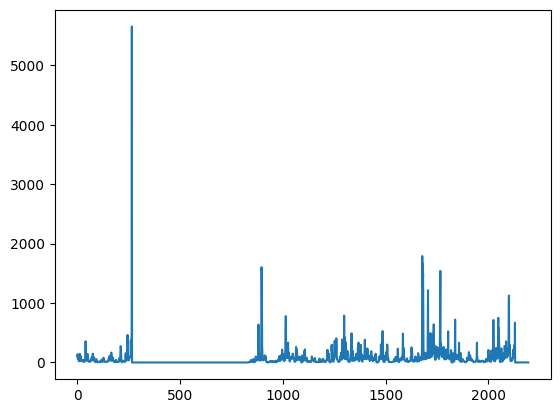

In [107]:
plt.plot(S1flow)

In [108]:
S2flow=pd.read_csv("./data/Stations/S2flow.txt", sep='  ', header=None,engine="python")
S2flow=S2flow.transpose()
S2flow.columns=["S2"]
S2flow.head(20)

,S2
0,1.727905
1,5.281199
2,8.754718
3,21.166835
4,34.468974
5,68.130408
6,185.068000
7,47.333427
8,41.016026
9,21.742803


7305

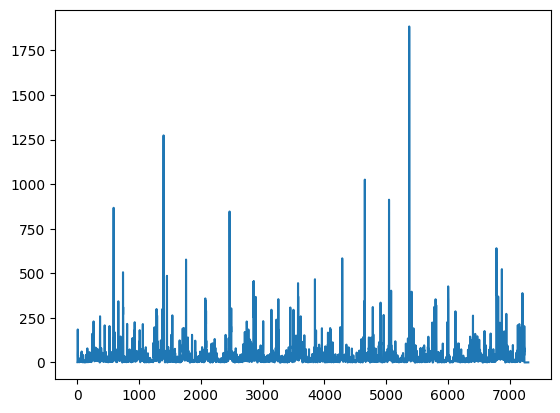

In [109]:

plt.plot(S2flow)
len(S2flow)

In [110]:
Time = np.linspace(0,20,len(S2flow))
print(len(Time))
# Completer S1 avec des zéros
N=len(S2flow)-len(S1flow)
S1zeros=pd.DataFrame({'value': [0] * N})
# Concatenate the zeros DataFrame with the original DataFrame
completed_S1flow = pd.concat([S1zeros, S1flow], ignore_index=True)
completed_S1flow=completed_S1flow['S1']
completed_S1flow



7305


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
7300    1.345
7301    1.277
7302    1.568
7303    2.653
7304    1.386
Name: S1, Length: 7305, dtype: float64

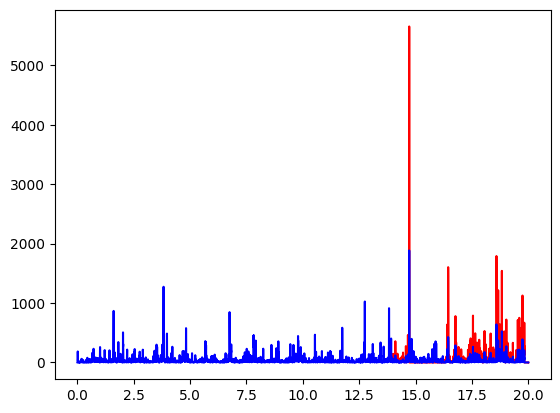

In [111]:
plt.plot(Time,completed_S1flow, color='r', label='S1')
plt.plot(Time,S2flow, color='blue')

In [112]:
# Define the beginning and ending dates
start_date = '2003-01-01'
end_date = '2022-12-31'

# Generate a date range
date_range = pd.date_range(start=start_date, end=end_date, periods=len(S2flow))
# Create global dataset
Discharge=S2flow
# Assign the date range to a new column in the DataFrame
Discharge['Date'] = pd.to_datetime(date_range)
Discharge['S1']=completed_S1flow
print(Discharge)

             S2       Date     S1
0      1.727905 2003-01-01    NaN
1      5.281199 2003-01-02    NaN
2      8.754718 2003-01-03    NaN
3     21.166835 2003-01-04    NaN
4     34.468974 2003-01-05    NaN
...         ...        ...    ...
7300   0.382368 2022-12-27  1.345
7301   0.425667 2022-12-28  1.277
7302   0.583371 2022-12-29  1.568
7303   0.739186 2022-12-30  2.653
7304   0.594796 2022-12-31  1.386

[7305 rows x 3 columns]


             S2       Date         S1
6939  26.865176 2021-12-31  70.584915
6940  20.233395 2022-01-01  52.355518
6941  20.619665 2022-01-02  61.858995
6942  10.281034 2022-01-03  30.843102
6943   3.424341 2022-01-04  13.564053
...         ...        ...        ...
7300   0.382368 2022-12-27   1.345000
7301   0.425667 2022-12-28   1.277000
7302   0.583371 2022-12-29   1.568000
7303   0.739186 2022-12-30   2.653000
7304   0.594796 2022-12-31   1.386000

[366 rows x 3 columns]


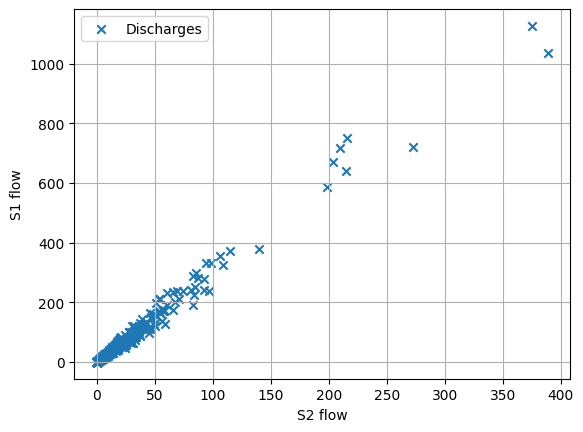

In [119]:
Last_year_data=Discharge[Discharge['Date']>=pd.to_datetime(end_date)- pd.DateOffset(years=1)]
print(Last_year_data)
plt.scatter(Last_year_data['S2'],Last_year_data['S1'],marker='x', label='Discharges')
plt.xlabel('S2 flow')
plt.ylabel('S1 flow')
plt.legend()
plt.grid()

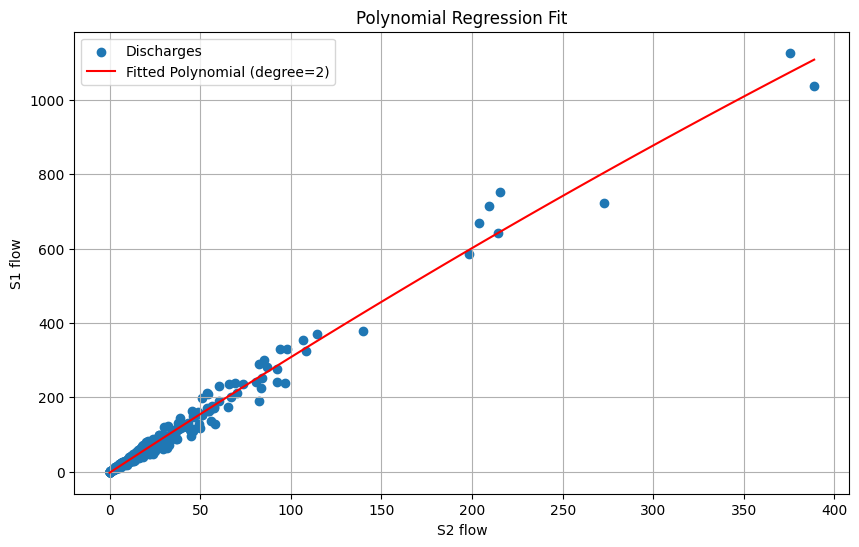

In [120]:

# Fit a polynomial regression model
degree = 2
coefficients = np.polyfit(Last_year_data['S2'],Last_year_data['S1'], degree)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(Last_year_data['S2'].min(), Last_year_data['S2'].max(), 100)
y_fit = polynomial(x_fit)

# Plot the original data points and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(Last_year_data['S2'],Last_year_data['S1'], label='Discharges')
plt.plot(x_fit, y_fit, color='red', label=f'Fitted Polynomial (degree={degree})')
plt.xlabel('S2 flow')
plt.ylabel('S1 flow')
plt.grid()
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


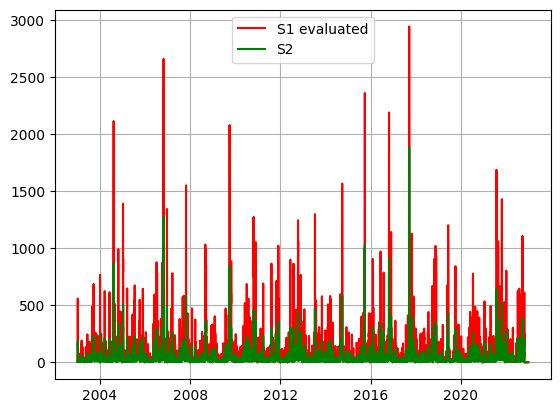

In [123]:
# Complete with values S1 from plynomial(S2,S1)
Discharge['S1']=polynomial(Discharge['S2'])
plt.plot(Discharge['Date'],Discharge['S1'], color='r', label='S1 evaluated')
plt.plot(Discharge['Date'],Discharge['S2'], color='g', label='S2')
plt.grid()
plt.legend()